# 시계열분석(Time Series)

    * 시간: 특정 간격을 갖는 시간(Lag)
      Lag에서 Data의 Trend를 찾는다.
    * 일변량 정상시계열
      ARIMA
    * Trend : 추세
    
#### csv 파일 다운로드: https://blog.naver.com/data_station/222493262626
#### 유튜브 강의: https://www.youtube.com/watch?v=0ErbtpR9HQA

In [1]:
# 기초적인 도구 소환
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프 출력 시 한글 처리를 위함. 설정 안하면 깨질 가능성이 높음.
mpl.rc('font', family='Malgun Gothic')

In [2]:
# Data11.csv 이라는 파일 읽어와서 개요 보기(=info()함수 사용)
df1 = pd.read_csv('Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [3]:
# 읽어온 자료의 상단 5개 출력. 괄호 안에 파라미터 설정 시 갯수 조절 가능
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [4]:
# 읽어온 자료의 하단 5개 출력. 괄호 안에 파라미터 설정 시 갯수 조절 가능
df1.tail(n=7)

,구매일,구매금액,물품대분류
803668,2020-08-06,3000,체험팩
803669,2020-08-06,6400,더블하트
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


### 파일 정렬이 '구매일' 기준인 것 같은데, 형태가 object임.

In [5]:
# change the data type of column '구매일' for 'datetime'
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [6]:
# Check the data type
df1['Datetime'].describe()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23184\2985957341.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [7]:
# Datetime으로 변환한 '구매일'을 년/월/주/일(요일)으로 세분화 후 추가
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day of Week'] = df1['Datetime'].dt.day_name()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23184\793232282.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Week'] = df1['Datetime'].dt.week


In [8]:
# 출력해보면...
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day of Week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


### Part.2

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

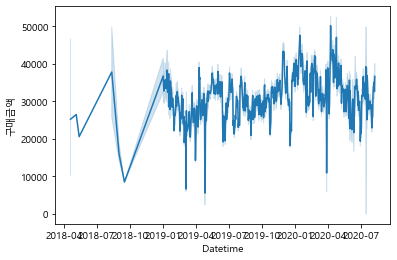

In [9]:
# Time Data를 그래프로 출력할 때는 2가지를 보통 사용
# 2가지는 보통 lineplot 아니면 pointplot
sns.lineplot(data=df1, x='Datetime', y='구매금액')

#### 상기의 그래프는 '구매일'에 발생한 '구매금액'의 '평균값'을 출력해버림.
    * lineplot의 estimator 설정을 하지 않았기 때문임.

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

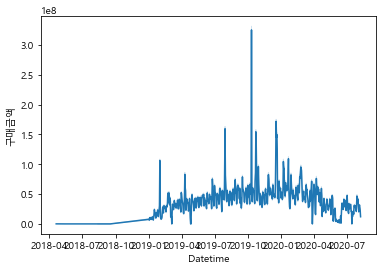

In [10]:
# estimator 를 sum 으로 설정하면
sns.lineplot(data=df1, x='Datetime', y='구매금액', estimator=sum)

# 80만 개의 데이터를 합하다 보니 시간이 오래 걸림

In [11]:
# sns.lineplot으로 해도 되지만, 피봇팅을 하면 조금 더 수월할 것임.
# 피봇팅이란? = 쉽게 말해, Pandas 데이터프레임을 재배치(ex: 행->열)하는 것
pv1 = pd.pivot_table(data=df1, 
               index='Datetime', values='구매금액', 
               aggfunc='sum').reset_index()

In [12]:
pv1

,Datetime,구매금액
0,2018-04-20,100920
1,2018-05-06,26500
2,2018-05-14,20600
3,2018-08-12,75700
4,2018-09-01,48300
...,...,...
584,2020-08-03,27560340
585,2020-08-04,31832500
586,2020-08-05,27683180
587,2020-08-06,22574070


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

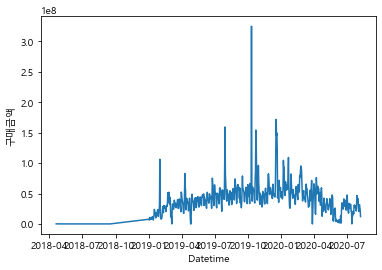

In [13]:
sns.lineplot(data=pv1, x='Datetime', y='구매금액')

In [14]:
pv2 = pd.pivot_table(data=df1,
                    index=['Datetime', '물품대분류'],
                    values='구매금액', aggfunc='sum').reset_index()
pv2

,Datetime,물품대분류,구매금액
0,2018-04-20,기저귀,57120
1,2018-04-20,더블하트,43800
2,2018-05-06,더블하트,26500
3,2018-05-14,FC,20600
4,2018-08-12,더블하트,75700
...,...,...,...
5241,2020-08-07,기타,182400
5242,2020-08-07,더블하트,408480
5243,2020-08-07,물티슈,100300
5244,2020-08-07,체험팩,112050


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

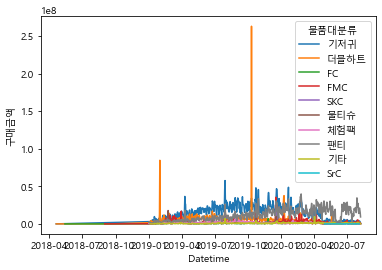

In [15]:
# hue의 역할: 색상으로 범주 표현(legend의 역할+색상)
sns.lineplot(data=pv2, x='Datetime', y='구매금액', hue='물품대분류')

In [16]:
# 특정 품목만 뽑아서 트렌드 보기 (White Noise 생각하기)
cond1 = df1['물품대분류'] == '기저귀'
df1.loc[cond1]

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day of Week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


In [17]:
# 2018자료 빼기
cond1 = df1['물품대분류'] == '기저귀'
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day of Week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday
